### Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Pacotes para modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Aula 1: Análise Exploratória
#### Desafios propostos

* 01: Investigar por que a classe tratamento é tão desbalanceada.

* 02: Plotar as 5 últimas linhas da tabela.

* 03: Proporção das classes tratamento.

* 04: Quantos tipos de drogas foram investigados.

* 05: Procurar na documentação o método query(pandas).

* 06: Renomear as colunas tirando o hífen.

* 07: Deixar os gráficos bonitões.

#### Importando os Dados

In [2]:
url_dados_experimentos = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'
# O arquivo tem 50MB+. É recomendado executar localmente. 

#### Dados experimentos

Com a análise abaixo, podemos assumir que a colunas estão divididas em: <br>
* id : Id do experimento. <br>
* tratamento: Com droga ou com controle (placebo). <br>
* tempo: Tempo de exposição à uma droga ou controle (24, 48 ou 72h). <br>
* dose: Dose aplicada (D1 ou D2). <br>
* droga: Composto utilizado no experimento. <br>
* g: Expressão gênica. <br>
* c: Viabilidade celular. <br>

In [3]:
dados = pd.read_csv(url_dados_experimentos, compression='zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
# Os dados são divididos em 23814 linhas e 877 colunas.
dados.shape

(23814, 877)

In [5]:
dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [6]:
# Extensão das colunas g e c
qt_g = [col for col in dados if col.startswith('g')]
qt_g[0], qt_g[-1]

('g-0', 'g-771')

In [7]:
qt_c = [col for col in dados if col.startswith('c')]
qt_c[0], qt_c[-1]

('c-0', 'c-99')

In [8]:
# Tipo das colunas
dados.iloc[:,0:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          23814 non-null  object
 1   tratamento  23814 non-null  object
 2   tempo       23814 non-null  int64 
 3   dose        23814 non-null  object
 4   droga       23814 non-null  object
dtypes: int64(1), object(4)
memory usage: 930.4+ KB


In [9]:
# Tipo das colunas g e c
dados[['g-0', 'c-0']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g-0     23814 non-null  float64
 1   c-0     23814 non-null  float64
dtypes: float64(2)
memory usage: 372.2 KB


### Verificando se há dados nulos

In [10]:
# Retorna True se qualquer valor no dataframe for nulo, caso contrário retorna False
dados.isnull().values.any()

False

In [11]:
# Verificando se cada id é único
dados.iloc[:,0].duplicated().sum()

0

### Equilibrio das classes de tratamento, dose e tempo.

#### Tratamento

In [12]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [13]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [14]:
dados['tratamento'].value_counts(normalize=True) * 100

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

Temos 2 valores únicos na coluna tratamento. Sendo, 21948 do tipo 'com_droga' e 1866 do tipo 'com_controle'. <br>
Isso representa, respectivamente, 92.16% e 7.84% do total.

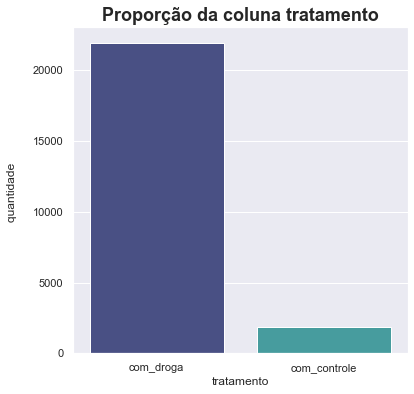

In [15]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x = 'tratamento',
                   data = dados,
                   order = dados['tratamento'].value_counts().index,
                   palette= "mako")
plt.ylabel('quantidade \n')
plt.title('Proporção da coluna tratamento', fontsize = 18, fontweight = 'bold')
plt.show()

Vemos um claro desbalanceamento entre os valores. Podemos utilizar o `query` para filtrar os dados baseados em algum critério. Vamos utilizá-lo para ver apenas os tratamentos com controle.

In [16]:
dados.query('tratamento == "com_controle"').head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,...,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,...,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364


Se observarmos, o tratamento com controle parece possuir apenas uma droga.

In [17]:
dados.query('tratamento == "com_controle"')['droga'].unique()

array(['cacb2b860'], dtype=object)


De acordo com a [wikipedia](https://pt.wikipedia.org/wiki/Grupo_de_controle):
> Num experimento controlado e comparativo, dois experimentos idênticos são conduzidos. Em um deles, com o grupo controle, o fator testado não é aplicado – recebem um tratamento padrão, um placebo ou nenhum tratamento. Em outro – o tratamento – o fator testado é aplicado.


O mais provável é que a droga cacb2b860 tenha sido administrada como placebo para fins comparativos.

#### Dose

In [18]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [19]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [20]:
dados['dose'].value_counts(normalize=True) * 100

D1    51.007811
D2    48.992189
Name: dose, dtype: float64

Temos 2 valores únicos na coluna dose. Sendo, 12147 do tipo 'D1' e 11667 do tipo 'D2'. <br>
Isso representa, respectivamente, 51% e 48.99% do total.

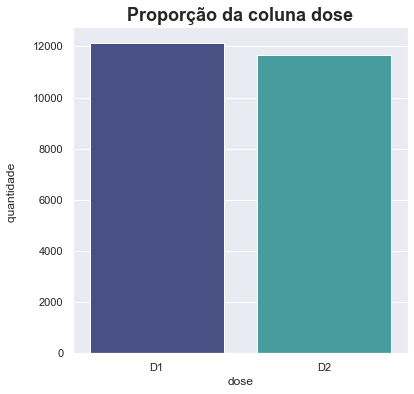

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'dose',
              data = dados,
              order = dados['dose'].value_counts().index,
              palette= "mako")
plt.ylabel('quantidade \n')
plt.title('Proporção da coluna dose', fontsize = 18, fontweight = 'bold')
plt.show()

#### Tempo

In [22]:
dados['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [23]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [24]:
dados['tempo'].value_counts(normalize=True) * 100

48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64

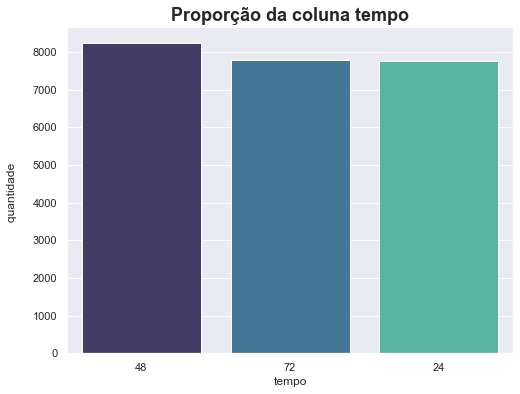

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'tempo',
              data = dados,
              order = dados['tempo'].value_counts().index,
              palette= "mako")
plt.ylabel('quantidade \n')
plt.title('Proporção da coluna tempo', fontsize = 18, fontweight = 'bold')
plt.show()

As colunas tempo e dose apresentam dados mais balanceados. Vamos conferir o balanceamento dos compostos utilizados nos experimentos com droga.

### Aula 2: Estudando os compostos

##### Desafios propostos
* 01: Ordenar o gráfico countplot
* 02: Melhorar a visualização alterando tamanho da fonte
* 03: Plotar os histogramas com seaborn
* 04: Estudar sobre as estatíticas retornadas no .describe()
* 05: Refletir sobre a manipulação do tamanho das visualizações.
* 06: Fazer outras análises com o boxplot e até com o histograma.

#### Compostos

In [26]:
# renomear a coluna droga para composto como proposto no desafio.
map = {'droga': 'composto'}
dados.rename(columns=map, inplace=True)

Como existem mais de 3.000 variações na nossa base de dados e para melhorar a visualização do histograma de compostos, decidimos elencar os 5 compostos que mais aparecem. Vamos remover a droga placebo e verificar quais foram as 5 drogas mais utilizadas nos experimentos.

In [27]:
# filtrar somente tratamentos com droga
com_droga = dados.query('tratamento == "com_droga"')

In [28]:
# 5 compostos mais utilizados
cod_compostos = com_droga['composto'].value_counts().index[:5]
cod_compostos

Index(['87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee', 'd08af5d4b'], dtype='object')

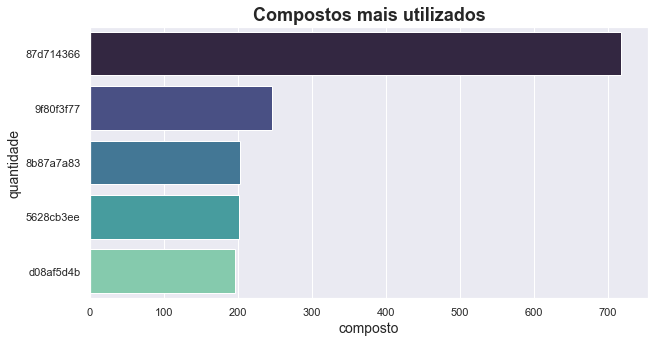

In [29]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(y = 'composto',
                   data = dados.query('composto in @cod_compostos'),
                   order = cod_compostos,
                   palette = "mako")

plt.xlabel('composto', fontsize=14)
plt.ylabel('quantidade', fontsize=14)
plt.title('Compostos mais utilizados', fontsize=18, fontweight='bold')

plt.show()

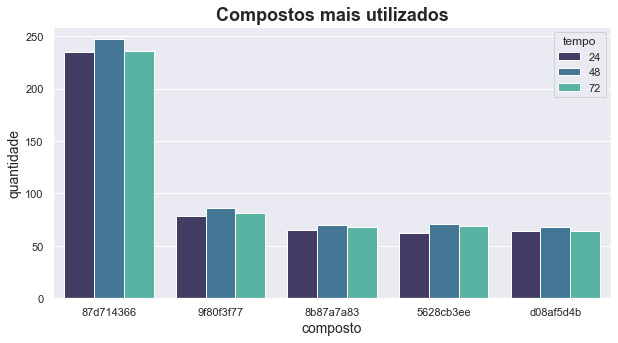

In [30]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x = 'composto',
                   data = dados.query('composto in @cod_compostos'),
                   order = cod_compostos,
                   palette = "mako",
                   hue = 'tempo')

plt.xlabel('composto', fontsize=14)
plt.ylabel('quantidade', fontsize=14)
plt.title('Compostos mais utilizados', fontsize=18, fontweight='bold')

plt.show()

Até o momento analisamos os dados de tempo, dose, compostos e afins. Vimos que há um desbalanceamento na quantidade de compostos e tratamentos, enquanto as outras classes estão mais balanceadas. É importante ter isso em conta no treinamento do modelo. 

Entretanto, não analisamos os dados de expressões gênicas (Gs) e viabilidade celular (Cs).

#### Expressões gênicas

Identificamos que foram setados valores mínimos e máximos entre -10 e 10 e uma distribuição normal, onde os valores tendem a ficar muito próximos à média. Isso descarta a necessidade de um pré-processamento de normalização dos dados antes de fornecê-los ao modelo.

In [31]:
# Para facilitar a manipulação dos dados, removeremos os hífens das colunas de gene e células
dados.columns = dados.columns.str.replace('-', '')

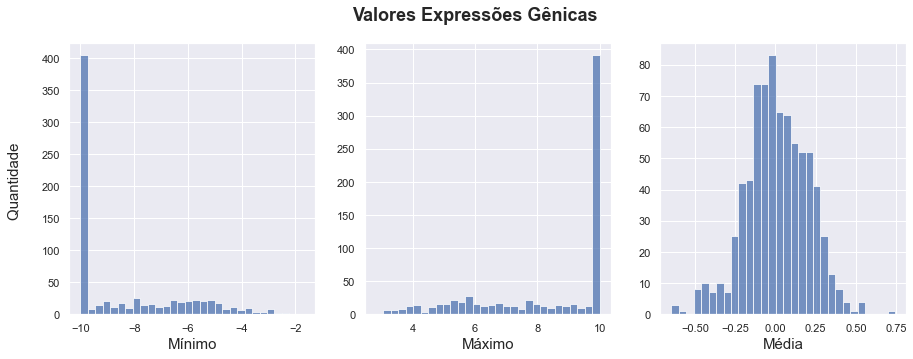

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data = dados.loc[:,'g0':'g771'].describe().T['min'], bins=30, ax=ax[0])
sns.histplot(data = dados.loc[:,'g0':'g771'].describe().T['max'], bins=30, ax=ax[1])
sns.histplot(data = dados.loc[:,'g0':'g771'].describe().T['mean'], bins=30, ax=ax[2])

ax[0].set_xlabel("Mínimo", fontsize=15)
ax[0].set_ylabel("Quantidade \n", fontsize=15)

ax[1].set_xlabel("Máximo", fontsize=15)
ax[1].set_ylabel("")

ax[2].set_xlabel("Média", fontsize=15)
ax[2].set_ylabel("")

fig.suptitle("Valores Expressões Gênicas", fontsize=18, fontweight='bold')

plt.show()

#### Viabilidade celular

Já na viabilidade celular, vemos uma maior distribuição nos valores máximos e que os dados estão mais longe da média.

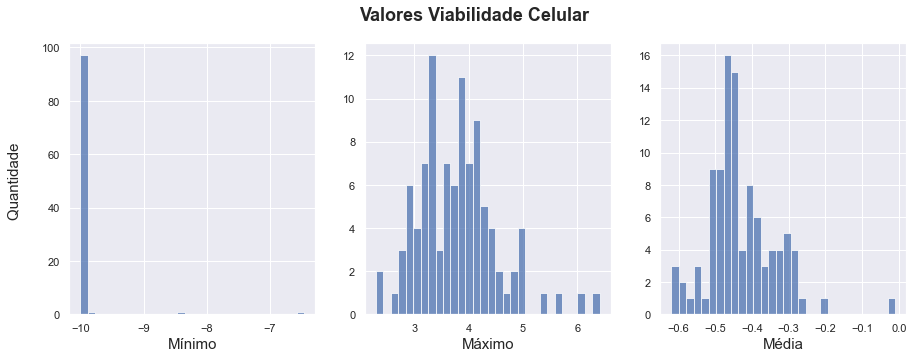

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data = dados.loc[:,'c0':'c99'].describe().T['min'], bins=30, ax=ax[0])
sns.histplot(data = dados.loc[:,'c0':'c99'].describe().T['max'], bins=30, ax=ax[1])
sns.histplot(data = dados.loc[:,'c0':'c99'].describe().T['mean'], bins=30, ax=ax[2])

ax[0].set_xlabel("Mínimo", fontsize=15)
ax[0].set_ylabel("Quantidade \n", fontsize=15)

ax[1].set_xlabel("Máximo", fontsize=15)
ax[1].set_ylabel("")

ax[2].set_xlabel("Média", fontsize=15)
ax[2].set_ylabel("")

fig.suptitle("Valores Viabilidade Celular", fontsize=18, fontweight='bold')

plt.show()

### Aula 3: Correlação entre valores g e c.

#### Desafios propostos

* 01: Criar tabelas de frequência com pandas.groupby()

* 02: Normalizar o crosstab pela coluna.

* 03: Explorar outros agregadores.

* 04: Explorar o melt.

* 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

* 06: Estudar o código que plota a matriz de correlação (heatmap)

### Correlação

- Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
- Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. Quer dizer:

- Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
- Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

In [44]:
dados.loc[:, 'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


A tabela mostra que as variáveis `g0` e `g8` estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado é de -0,604212.

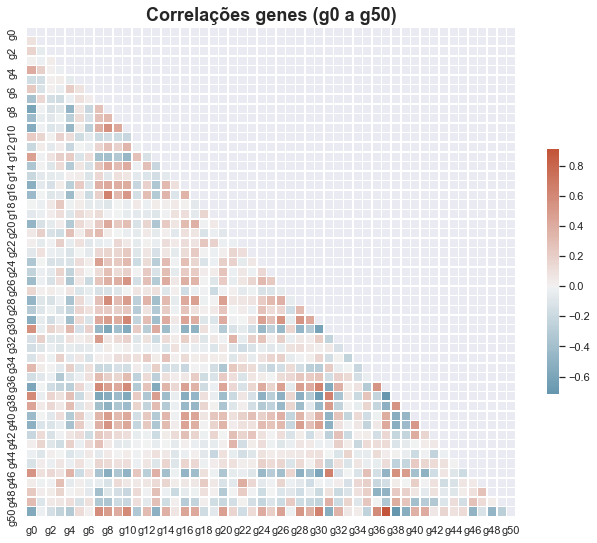

In [45]:
corr_genes = dados.loc[:, 'g0':'g50'].corr()

mask = np.triu(np.ones_like(corr_genes, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlações genes (g0 a g50)', fontsize = 18, fontweight = 'bold')

plt.show()

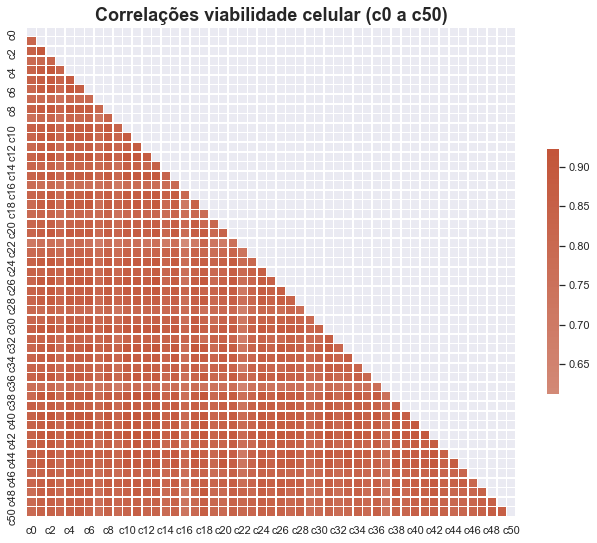

In [46]:
corr_celular = dados.loc[:, 'c0':'c50'].corr()

mask = np.triu(np.ones_like(corr_celular, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlações viabilidade celular (c0 a c50)', fontsize = 18, fontweight = 'bold')

plt.show()

In [47]:
cg = dados.query('tratamento == "com_droga"').filter(regex="^[c|g](50|[0-4][0-9]|[0-9])$")

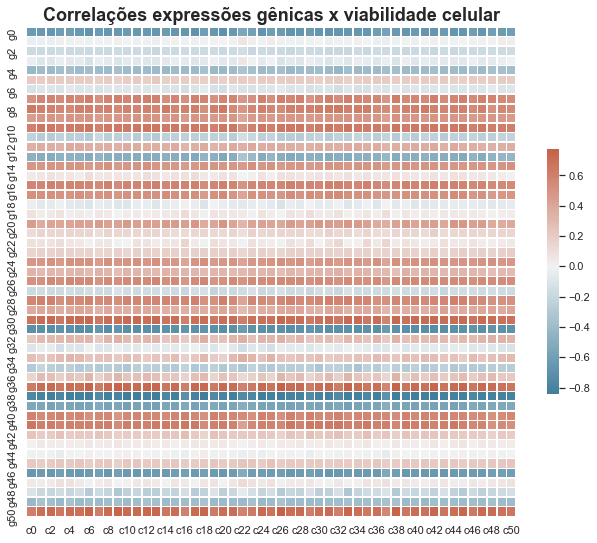

In [48]:
corr_cg = cg.corr().loc[:'g50', 'c0':]

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_cg, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlações expressões gênicas x viabilidade celular', fontsize = 18, fontweight = 'bold')

plt.show()

Na matriz de correlação, vemos genes com correlação bem positiva, como g36 e g50. Isso indica que uma alta expressão desse gene pode estar relacionada a uma alta viabilidade celular. O contrário acontece com o gene g38 e g46. 

É importante destacar que não podemos inferir causalidade a partir da correlação. Exemplificando: vimos que g0 e g8 têm correlação inversamente proporcional entre si mas não podemos concluir que é o g0 que faz o g8 diminuir, ou seja, a causa.

#### Desafio: escolher um gene e analisá-lo

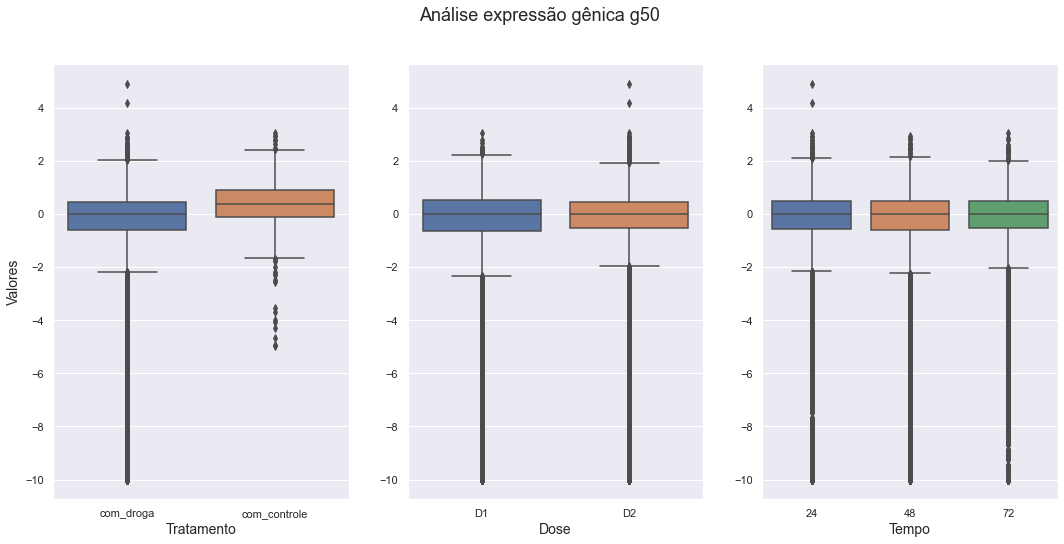

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

sns.boxplot(y='g50', x='tratamento', data=dados, ax=ax[0])
sns.boxplot(y='g50', x='dose', data=dados, ax=ax[1])
sns.boxplot(y='g50', x='tempo', data=dados, ax=ax[2])

ax[0].set_xlabel('Tratamento', fontsize=14)
ax[1].set_xlabel('Dose', fontsize=14)
ax[2].set_xlabel('Tempo', fontsize=14)

ax[0].set_ylabel('Valores', fontsize=14)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

fig.suptitle('Análise expressão gênica g50', fontsize=18)
plt.show()

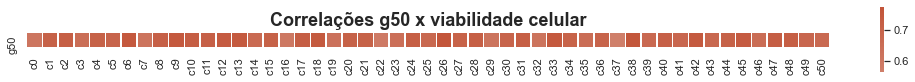

In [50]:
# gene 50
g50 = cg.corr().loc['g50':'g50', 'c0':]

f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(g50, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .1})
plt.title('Correlações g50 x viabilidade celular', fontsize=18, fontweight='bold')

plt.show()

No gráfico abaixo, verificamos uma correlação positiva entre g50 e c38. Também vemos a diferença dos valores sob influência do tempo e dose ministrada.

In [51]:
sns.lmplot(data=com_droga, x='g50', y='c38', line_kws={'color':'red'}, col='tempo', row='dose')
plt.show()

KeyError: "['g50', 'c38'] not in index"

### Aula 4: Análise Exploratória MoA (Mecanismos de Ação)

#### Desafios propostos

* 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

* 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

* 03: Criar três colunas para indicar o tempo 24, 48, 72

* 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

* 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

* 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

Nesse dataset, recebemos os resultados dos experimentos do dataset anterior. Estes são identificados pelo id de cada experimento. Na análise abaixo, vemos que cada coluna representa uma reação ou inibição ao composto e recebe apenas dois valores: verdadeiro (1) ou falso (0). <br>

In [52]:
dados_moa = pd.read_csv(url_dados_resultados)
dados_moa.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
dados_moa.shape

(23814, 207)

In [54]:
# vemos que cada reação possui apenas verdadeiro ou falso
dados_moa['acat_inhibitor'].unique()

array([0, 1], dtype=int64)

In [55]:
dados_moa['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

In [56]:
# Quantidade de tipos de ações
tipos_moa = pd.DataFrame(dados_moa.drop('id', axis=1).columns.str.split('_').str[-1].value_counts()).reset_index()
tipos_moa.columns = ['ação', 'quantidade']
tipos_moa = tipos_moa.sort_values(by = ['quantidade'], ascending = False)

tipos_moa.head()

,ação,quantidade
0,inhibitor,112
1,antagonist,32
2,agonist,28
3,activator,5
4,agent,3


Text(0.5, 1.0, 'Tipos de MoA ativados')

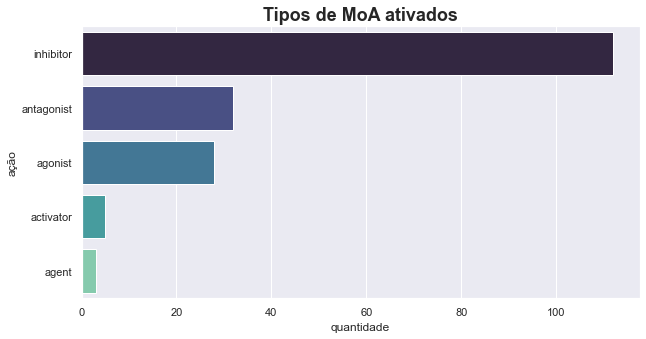

In [57]:
plt.figure(figsize= (10,5))

ax = sns.barplot(y = tipos_moa['ação'].head(),
                 x = tipos_moa.quantidade.sort_values(ascending=True),
                 palette = "mako")

plt.title("Tipos de MoA ativados", fontsize=18, weight="bold")

In [58]:
contagem_moa = dados_moa.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Text(0, 0.5, 'MoA')

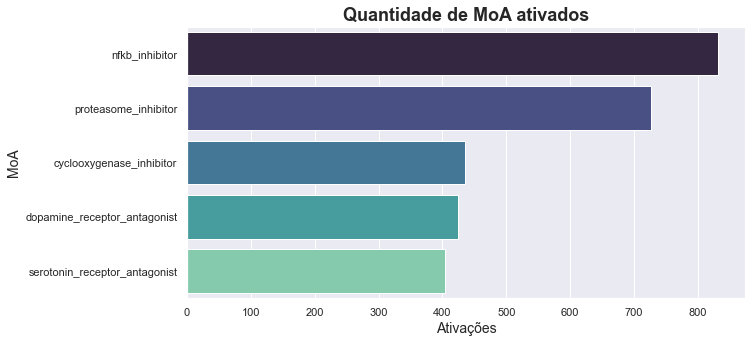

In [59]:
plt.figure(figsize= (10,5))

ax = sns.barplot(y = dados_moa.iloc[:,1:-1].sum(axis=0).sort_values(ascending=False).head().index,
                 x = dados_moa.iloc[:,1:-1].sum(axis=0).sort_values(ascending=False).head().values,
                palette = "mako")
plt.title("Quantidade de MoA ativados", fontsize = 18, weight = "bold")
plt.xlabel("Ativações", fontsize = 14)
plt.ylabel("MoA", fontsize = 14)

### Aula 5: Machine Learning

#### Desafios propostos

* 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

* 02: Estude a documentação do Sklearn.

* 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator

* 04: Teste outras problemas (perguntas). 0, 1 ou +.

* 05: Escolha a droga mais utilizada e tente criar um modelo para prever esta label.

### Tratamento dos dados

In [60]:
# Soma por linhas a qtd de moas ativados
dados_moa['n_moa'] = dados_moa.drop('id', axis=1).sum(axis=1)

In [61]:
# Adiciona uma coluna que indica se algum moa foi ativado
dados_moa['ativo_moa'] = (dados_moa['n_moa'] != 0)
dados_moa.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


#### Combinando os datasets

In [62]:
dados_combinados = pd.merge(dados, dados_moa[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [63]:
print('MoAs ativados tratamento com controle\n {} {}'.format(dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].unique()[0],
                                     dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()[0]))

print('\nMoAs ativados tratamento com droga \n {} {} \n {} {}'.format(dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].unique()[0],
                                              dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()[0],
                                              dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].unique()[1],
                                              dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()[1]))

MoAs ativados tratamento com controle
 False 1866

MoAs ativados tratamento com droga 
 True 7501 
 False 14447


Como esperado, os tratamentos placebos "com controle" não ativam nenhum mecanismo de ação. Na classe "com droga" 65% dos experimentos ativaram algum mecanismo de ação e 34% não ativaram nenhum.

## Aula 5

In [67]:
seed = 10

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

# separa os valores de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

In [68]:
# regressão logística
modelo_rlogistica = LogisticRegression(max_iter=1000)

# x equivale a assinatura celular, y ao ativo
modelo_rlogistica.fit(x_treino, y_treino)

print('Precisão: {:.2f}%.'.format(modelo_rlogistica.score(x_teste, y_teste)*100))

Precisão: 62.82%.


In [69]:
# dummy

# pega o valor mais frequente
modelo_dummy = DummyClassifier(strategy='most_frequent')

# treino
modelo_dummy.fit(x_treino, y_treino)

print('Precisão: {:.2f}%.'.format(modelo_dummy.score(x_teste, y_teste)*100))

Precisão: 60.68%.


In [70]:
# Decision Tree

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)

print('Precisão: {:.2f}%.'.format(modelo_arvore.score(x_teste, y_teste)*100))

Precisão: 60.74%.


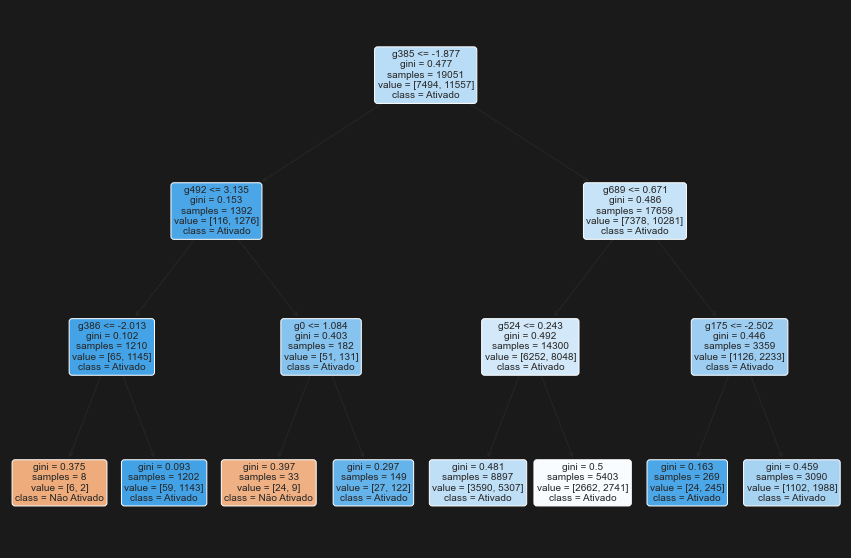

In [71]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
              ax=ax,
              fontsize=10,
              rounded=True,
              filled=True,
              feature_names=x_treino.columns,
              class_names=['Não Ativado', 'Ativado'])
plt.show()

Quando mais profundidade você adiciona a árvore, melhor ele fica em adivinhar os dados de treino mas pior em adivinhar dados não treinados e perde a capacidade de acertar (overfit). Uma das maneiras de contornar esse problema é criar várias árvores de decisões com amostras aleatórias de dados, essa estratégia é chamada de Random Forest.

O overfit é um fenômeno no qual o sistema de aprendizagem se ajusta perfeitamente aos dados de treinamento, de forma que se torna impreciso ao prever os resultados dos dados não treinados.

In [73]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=seed)

teste = []
treino = []
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = 1)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste)*100)
    treino.append(modelo_arvore.score(x_treino, y_treino)*100)

In [74]:
teste

[60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275,
 60.67604450976275]

In [75]:
treino

[60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384,
 60.66348223190384]

<AxesSubplot:>

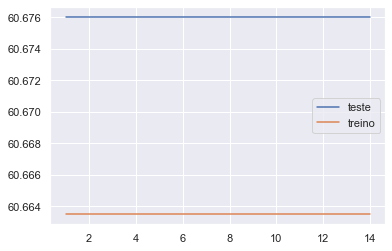

In [76]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')

In [77]:
# RandomForest

X = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
X = pd.get_dummies(X, columns=['tratamento', 'dose', 'tempo'])
Y = dados_combinados['ativo_moa']
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, stratify=y, random_state=seed)

modelo_randomforest = RandomForestClassifier(max_depth = 3)
modelo_randomforest.fit(X_treino, Y_treino)
modelo_randomforest.score(X_teste, Y_teste)
print('Precisão: {:.2f}%.'.format(modelo_randomforest.score(X_teste, Y_teste)*100))

Precisão: 68.13%.


### Conclusão

Após a análise, concluímos que a classe tratamento está desbalanceada, fazendo com que a máquina aprenda muito no tratamento com_droga mas não no tratamento com_controle. No dataset resultados (MoA) também há um grande desbalanceamento de mecanismos ativados, dificultando aplicar um modelo de ML sem balanceamento dos dados.